In [32]:
# Importing modules needed for data analysis.
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
from scipy import signal as ss
from scipy import constants as cs
from pylab import *
import glob

In [33]:
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/BandGap'+path+'.txt'
    path = path.replace(" ", "%20")
    return path



In [34]:
%%capture --no-display
#Read in data from gitlab

Si20 = np.array([pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si10 = np.array([pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si0 = np.array([pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_10 = np.array([pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Si-10"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
Si_20 = np.array([pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si-20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])

Ge20 = np.array([pd.read_csv(url("/3_7_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
Ge10 = np.array([pd.read_csv(url("/3_2_23Ge10"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Ge10"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
Ge0 = np.array([pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
Ge_10 = np.array([pd.read_csv(url("/3_2_23Ge-10"), skiprows=1, sep='  ').to_numpy().T[0][:-15]*10**(3), pd.read_csv(url("/3_2_23Ge-10"), skiprows=1, sep='  ').to_numpy().T[1][:-15]])
Ge_20 = np.array([pd.read_csv(url("/3_7_23Ge-20"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Ge-20"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])




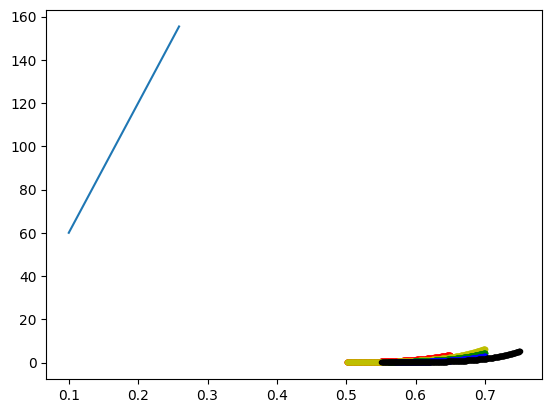

In [35]:
plot(Si20[1],Si20[0],'r.')
plot(Si10[1],Si10[0],'y.')
plot(Si0[1],Si0[0],'g.')
plot(Si_10[1],Si_10[0],'b.')
plot(Si_20[1],Si_20[0],'k.')


(0.0, 0.6)

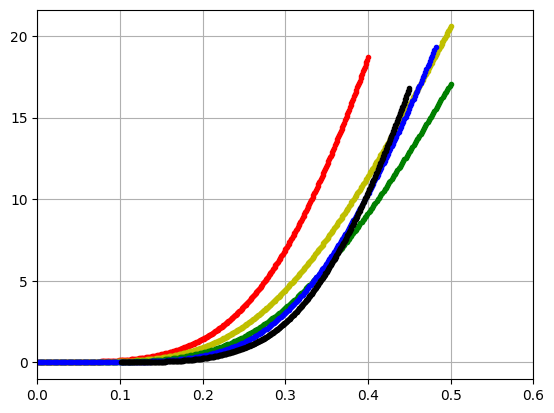

In [38]:
plot(Ge20[1],Ge20[0],'r.')
plot(Ge10[1],Ge10[0],'y.')
plot(Ge0[1],Ge0[0],'g.')
plot(Ge_10[1],Ge_10[0],'b.')
plot(Ge_20[1],Ge_20[0],'k.')
plt.grid()
plt.xlim(0,0.6)
#plt.ylim(0,0.8)

In [61]:
%%capture --no-display
begs = 375

Ge0 = np.array([pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][begs:-2]*10**(3), pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][begs:-2]])


def lin(x,m,b):
    return m*x+b

p, C = curve_fit(lin,Ge0[1],Ge0[0], absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err1 = sigp[0]
err2 = sigp[1]



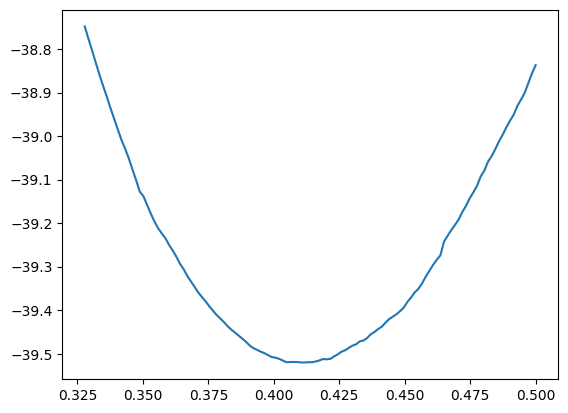

In [67]:
%%capture --no-display
#Ge0 = np.array([pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_2_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][:-2]])
New = Ge0[0]-(m)*Ge0[1]+b

#plot(Ge0[1],Ge0[0])
plot(Ge0[1],New)


0.013783221819090025


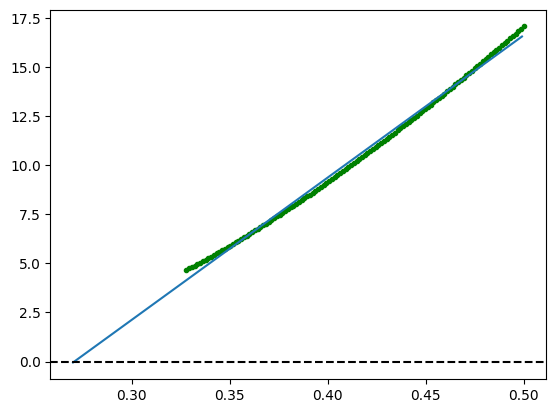

In [54]:
plot(Ge0[1],Ge0[0],'g.')
x = np.arange(0.27,0.5,0.001)
plot(x,lin(x,m,b))
plt.axhline(0, color='black', ls='--')
print(1/m)

(0.0, 0.6)

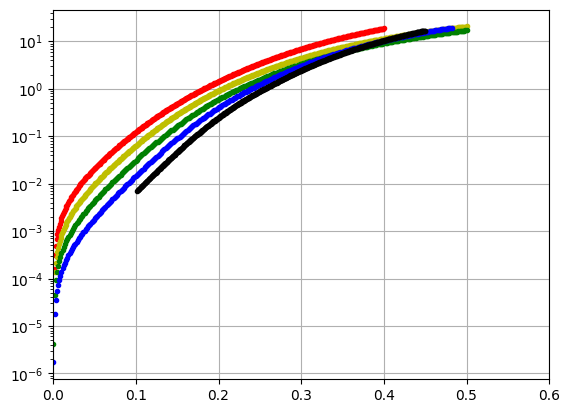

In [6]:
plt.semilogy(Ge20[1],Ge20[0],'r.')
plot(Ge10[1],Ge10[0],'y.')
plot(Ge0[1],Ge0[0],'g.')
plot(Ge_10[1],Ge_10[0],'b.')
plot(Ge_20[1],Ge_20[0],'k.')
plt.grid()
plt.xlim(0,0.6)

1.3345749459634543e-08
1.3345749459634543e-08


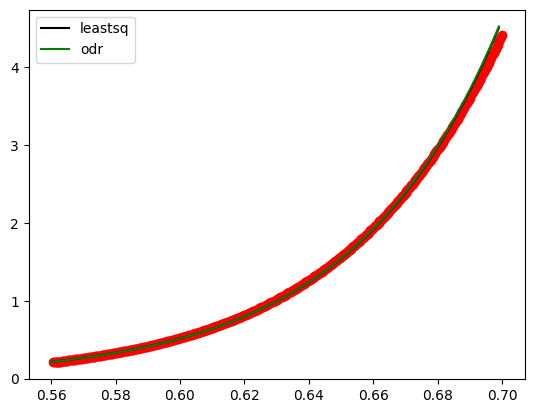

In [7]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*np.exp((q*V)/(k*T))

data = RealData(Si0[1], Si0[0], sx= 0.01*Si0[1], sy=0.05*Si0[0])
model = Model(current)

odr = ODR(data,model, beta0=[10e-6, 273.])
odr.set_job(fit_type=2)
output = odr.run()

x = np.arange(0.56,0.7,.001)
y = current(output.beta,x)

plot(Si0[1],Si0[0],'ro')
plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = current(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)

I_0 = output.beta[0]
T = output.beta[1]

I_0err = output.sd_beta[0]
Terr = output.sd_beta[0]
print(I_0err)
print(Terr)

In [8]:

def current(V, I_0,T):
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*np.exp((q*V)/(k*T))

p, C = curve_fit(current, Si0[1], Si0[0], absolute_sigma=True, p0=[0., 273.], sigma=0.05*Si0[1])
sigp = np.sqrt(np.diag(C))
I_0 = p[0]
T = p[1]
err1 = sigp[0]
err2 = sigp[1]
print(sigp)

[3.73481918e-08 8.91389092e-01]


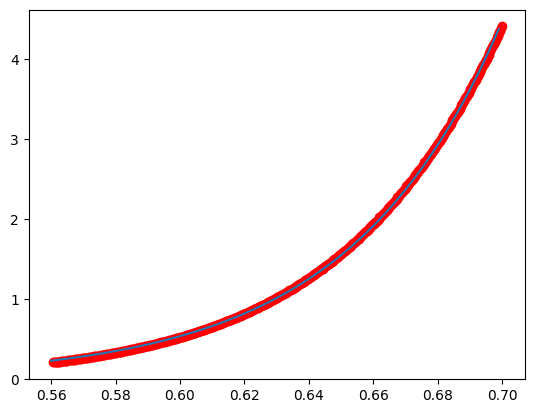

In [9]:
plt.plot(Si0[1],Si0[0],'ro')
plt.plot(x, current(x,I_0,T))

In [10]:
print(err1)
print(err2)
print(sigp)

3.734819179674358e-08
0.8913890920043376
[3.73481918e-08 8.91389092e-01]


In [11]:
Si0 = np.array([np.log(pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3)), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])



/tmp/ipykernel_490352/2987449860.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Si0 = np.array([np.log(pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3)), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])
/tmp/ipykernel_490352/2987449860.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Si0 = np.array([np.log(pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3)), pd.read_csv(url("/3_2_23Si0"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])


0.036692355109484216
0.036692355109484216
273.0
-26.69130285016171
2.559260285516144e-12


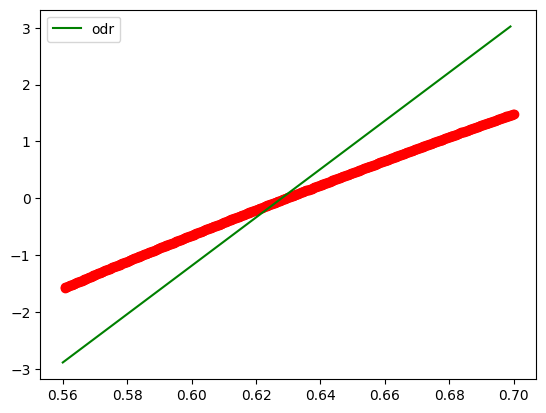

In [12]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0 + (q*V)/(k*T)

data = RealData(Si0[1], Si0[0], sx= 0.01*Si0[1], sy=0.05*Si0[0])
model = Model(current)

odr = ODR(data,model, beta0=[10e-6, 273.], ifixb=[1,0])
odr.set_job(fit_type=2)
output = odr.run()

x = np.arange(0.56,0.7,.001)
y = current(output.beta,x)

plot(Si0[1],Si0[0],'ro')
#plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = current(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)

I_0 = output.beta[0]
T = output.beta[1]

I_0err = output.sd_beta[0]
Terr = output.sd_beta[0]
print(I_0err)
print(Terr)
print(T)
print(I_0)
print(np.exp(I_0))

In [13]:

def current(V, I_0,T):
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0 + (q*V)/(k*T)

p, C = curve_fit(current, Si0[1], Si0[0], absolute_sigma=True, p0=[10e-6, 273.], sigma=0.05*Si0[1],bounds=[[-50,0],[273,273]])
sigp = np.sqrt(np.diag(C))
I_0 = p[0]
T = p[1]
err1 = sigp[0]
err2 = sigp[1]
print(p)
print(sigp)

[-26.6839085 273.       ]
[0.02184666 0.22399273]


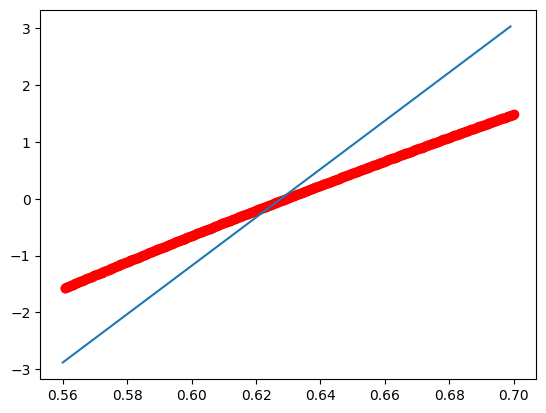

In [14]:
plt.plot(Si0[1],Si0[0],'ro')
plt.plot(x, current(x,I_0,T))

In [15]:
%%capture --no-display
#2nd data collection for Ge

v20 = -88
v10 = -41
v0 = -2
v_10 = -67
v_20 = -60

Ge20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][:v20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][:v20]])
Ge10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[0][:v10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge10"), skiprows=1, sep='  ').to_numpy().T[1][:v10]])
Ge0 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[0][:v0]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge0"), skiprows=1, sep='  ').to_numpy().T[1][:v0]])
Ge_10 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[0][:v_10]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_10"), skiprows=1, sep='  ').to_numpy().T[1][:v_10]])
Ge_20 = np.array([pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[0][:v_20]*10**(3), pd.read_csv(url("/Ge2/3_21_23Ge_20"), skiprows=1, sep='  ').to_numpy().T[1][:v_20]])



(0.1, 0.5)

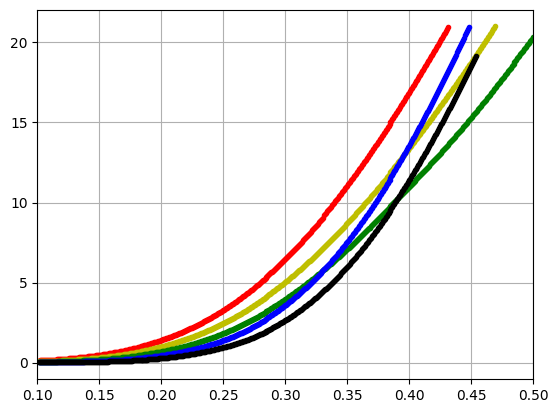

In [16]:
plot(Ge20[1],Ge20[0],'r.')
plot(Ge10[1],Ge10[0],'y.')
plot(Ge0[1],Ge0[0],'g.')
plot(Ge_10[1],Ge_10[0],'b.')
plot(Ge_20[1],Ge_20[0],'k.')
plt.grid()
plt.xlim(0.1,0.5)
#plt.ylim(0.1,0.8)


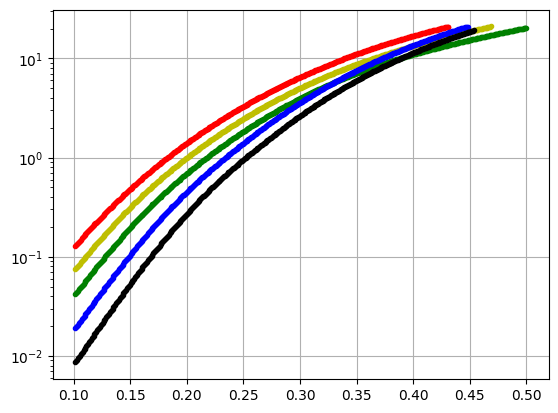

In [17]:
plt.semilogy(Ge20[1],Ge20[0],'r.')
plot(Ge10[1],Ge10[0],'y.')
plot(Ge0[1],Ge0[0],'g.')
plot(Ge_10[1],Ge_10[0],'b.')
plot(Ge_20[1],Ge_20[0],'k.')
plt.grid()
#plt.xlim(0,0.6)

In [18]:

def assump(V,T):
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return np.exp(q*V/(k*T))

Tarr = np.array([293,283,273,263,253])
Varr = np.ones(5)*0.1
print(assump(Varr,Tarr))


[52.4880954  60.37266515 70.15725614 82.46420371 98.17641918]


In [19]:
%%capture --no-display

Si20 = np.array([pd.read_csv(url("/3_23_23Si20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_23_23Si20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])





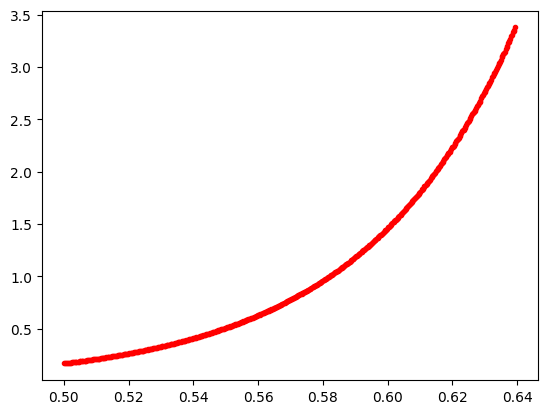

In [20]:
plot(Si20[1],Si20[0],'r.')

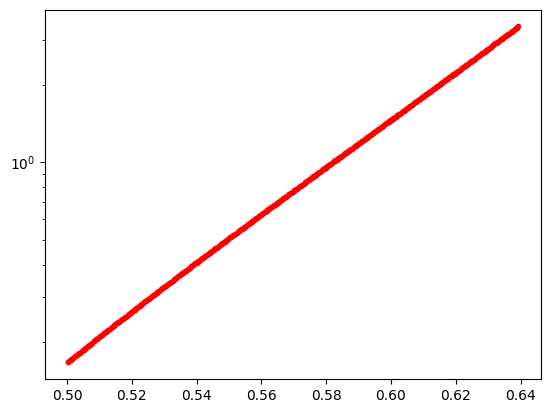

In [21]:
plt.semilogy(Si20[1],Si20[0],'r.')

4.2515148773451155e-12
4.2515148773451155e-12
1.2888162779745853e-10
293.0


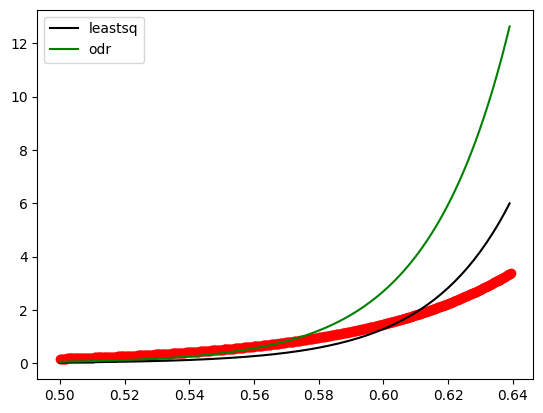

In [22]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*np.exp((q*V)/(k*T))

data = RealData(Si20[1], Si20[0], sx= 0.01*Si20[1], sy=0.05*Si20[0])
model = Model(current)

odr = ODR(data,model, beta0=[10e-6, 293.], ifixb=[1,0] )
odr.set_job(fit_type=2)
output = odr.run()

x = np.arange(0.5,0.64,.001)
y = current(output.beta,x)

plot(Si20[1],Si20[0],'ro')
plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = current(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)

I_0 = output.beta[0]
T = output.beta[1]

I_0err = output.sd_beta[0]
Terr = output.sd_beta[0]
print(I_0err)
print(Terr)
print(I_0)
print(T)

0.03252533948766892
0.03252533948766892
293.0
-22.789504643106447
1.2666128455851904e-10


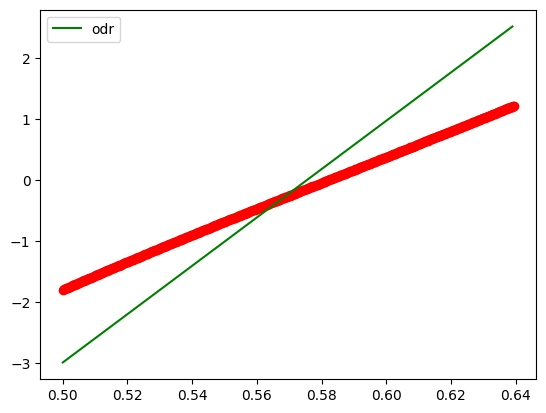

In [23]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0 + (q*V)/(k*T)

data = RealData(Si20[1], np.log(Si20[0]), sx= 0.01*Si20[1], sy=0.05*np.log(Si20[0]))
model = Model(current)

odr = ODR(data,model, beta0=[10e-6, 293.], ifixb=[1,0])
odr.set_job(fit_type=2)
output = odr.run()

x = np.arange(0.5,0.64,.001)
y = current(output.beta,x)

plot(Si20[1],np.log(Si20[0]),'ro')
#plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = current(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)

I_0 = output.beta[0]
T = output.beta[1]

I_0err = output.sd_beta[0]
Terr = output.sd_beta[0]
print(I_0err)
print(Terr)
print(T)
print(I_0)
print(np.exp(I_0))

In [24]:
%%capture --no-display

Si20 = np.array([pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[0][:-2]*10**(3), pd.read_csv(url("/3_7_23Si20"), skiprows=1, sep='   ').to_numpy().T[1][:-2]])



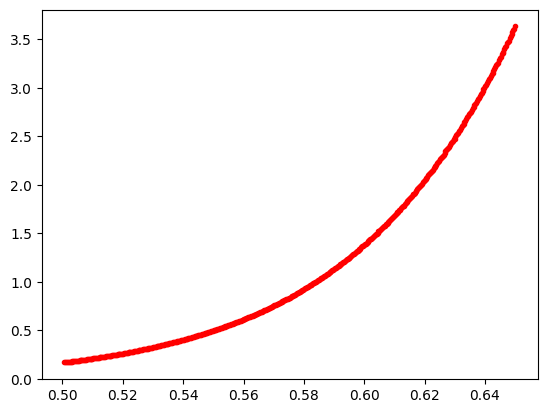

In [25]:
plot(Si20[1],Si20[0],'r.')

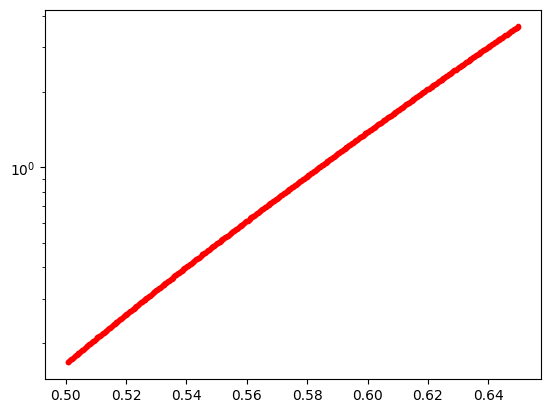

In [26]:
plt.semilogy(Si20[1],Si20[0],'r.')

In [27]:
%%capture --no-display
over = -350

Ge20 = np.array([pd.read_csv(url("/3_23_23Ge20"), skiprows=1, sep='  ').to_numpy().T[0][:over]*10**(3), pd.read_csv(url("/3_23_23Ge20"), skiprows=1, sep='  ').to_numpy().T[1][:over]])


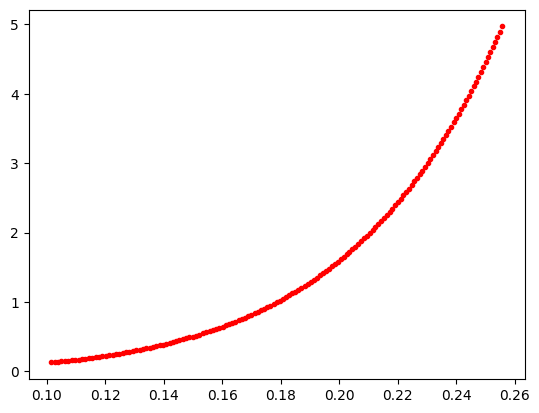

In [28]:
plot(Ge20[1],Ge20[0],'r.')

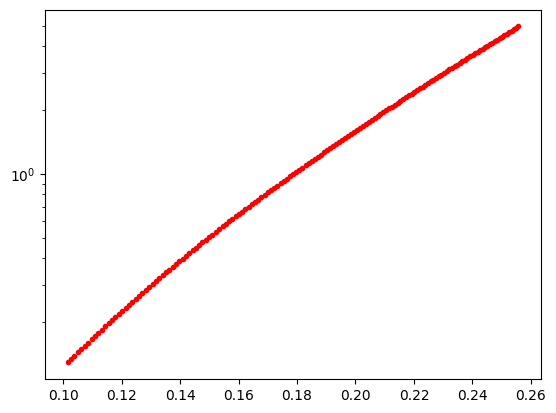

In [29]:
plt.semilogy(Ge20[1],Ge20[0],'r.')

4.837773348729701e-05
4.837773348729701e-05
0.0007691989117698812
293.0


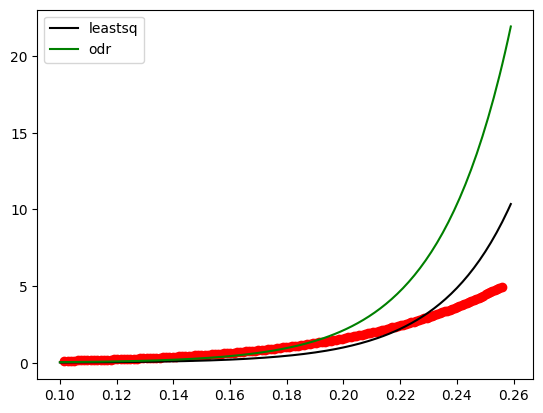

In [30]:
#Theory

def current(beta, V):
    I_0,T = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*np.exp((q*V)/(k*T))

data = RealData(Ge20[1], Ge20[0], sx= 0.01*Ge20[1], sy=0.05*Ge20[0])
model = Model(current)

odr = ODR(data,model, beta0=[10e-6, 293.], ifixb=[1,0] )
odr.set_job(fit_type=2)
output = odr.run()

x = np.arange(0.1,0.26,.001)
y = current(output.beta,x)

plot(Ge20[1],Ge20[0],'ro')
plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = current(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)

I_0 = output.beta[0]
T = output.beta[1]

I_0err = output.sd_beta[0]
Terr = output.sd_beta[0]
print(I_0err)
print(Terr)
print(I_0)
print(T)

In [ ]:
def fit(dat,temp,cut1,cut2):
    data = RealData(dat[1][cut1:cut2], dat[0][cut1:cut2], sx= 0.01*dat[1][cut1:cut2], sy=0.05*dat[0][cut1:cut2])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp], ifixb=[1,0] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [ ]:
ls,odr = fit(Si20,293,495,-1)

print(odr)


In [1]:
x = np.arange(0.56,0.7,.001)
y = current(odr[0],x)

plot(Si0[1],Si0[0],'ro')

plot(x,y,'g-',label='odr')

NameError: name 'np' is not defined

In [ ]:
# Alternative model, Resistor

def current(beta, V):
    I_0,T,R = beta
    q = cs.physical_constants['elementary charge'][0] #C
    k = cs.physical_constants['Boltzmann constant'][0] #J/K
    return I_0*(np.exp((q*V)/(k*T))-1) +V/R

In [ ]:
def fit(dat,temp,cut1,cut2):
    data = RealData(dat[1][cut1:cut2], dat[0][cut1:cut2], sx= 0.01*dat[1][cut1:cut2], sy=0.05*dat[0][cut1:cut2])
    model = Model(current)

    odr = ODR(data,model, beta0=[10e-6, temp,1], ifixb=[1,0,1] )
    
    odr.set_job(fit_type=2)
    output1 = odr.run()
    
    odr.set_job(fit_type=0)
    output2 = odr.run()
    return [output1.beta,output1.sd_beta],[output2.beta,output2.sd_beta]

In [2]:

a,odrSi20 = fit(Si20,293,0,-1)
a,odrSi10 = fit(Si10,283,0,-1)
a,odrSi0 = fit(Si0,273,0,-1)
a,odrSi_10 = fit(Si_10,263,0,-1)
a,odrSi_20 = fit(Si_20,253,0,-1)

a,odrGe20 = fit(Ge20,293,0,-1)
a,odrGe10 = fit(Ge10,283,0,-1)
a,odrGe0 = fit(Ge0,273,0,-1)
a,odrGe_10 = fit(Ge_10,263,0,-1)
a,odrGe_20 = fit(Ge_20,253,0,-1)


NameError: name 'fit' is not defined

In [3]:
ls,odr = fit(Si0,273,0,-1)

print(odr)

NameError: name 'fit' is not defined

In [ ]:
x = np.arange(0.56,0.7,.001)
y = current(odr[0],x)

plot(Si0[1],Si0[0],'ro')

plot(x,y,'g-',label='odr')

In [ ]:
I_0 = np.array([odrSi20[0][0],odrSi10[0][0],odrSi0[0][0],
               odrSi_10[0][0],odrSi_20[0][0],odrGe20[0][0],
               odrGe10[0][0],odrGe0[0][0],odrGe_10[0][0],odrGe_20[0][0]])

x = 1/np.array([293,283,273,263,253,293,283,273,263,253])
y = np.log(I_0)


In [4]:
plt.scatter(x,y)

NameError: name 'plt' is not defined